In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000, path = "data")

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of d6586e694ee56d7a4e65172e12b3e987c03096cb01eab99753921ef915959916 so we will re-download the data.
2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
word_indices = reuters.get_word_index()
word_indices_reversed = dict(
    [(value, key) for (key, value) in word_indices.items()]
)
word_0 = " ".join([word_indices_reversed.get(i-3, "|reserved|") for i in train_data[0]])
word_0

'|reserved| |reserved| |reserved| said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
def vectorize_sequence(sequences, dimension = 10000):
    result = np.zeros(shape = (len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            result[i, j] = 1
    return result


In [10]:
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)


In [16]:
def one_hot_encoder(labels, dimension = 46):
    result = np.zeros(shape=(len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1
    return result


In [17]:
y_train = one_hot_encoder(train_labels)
y_test = one_hot_encoder(test_labels)

Also possible: 

```python
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
```


In [37]:
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"), 
    layers.Dense(46, activation = "softmax")
])

In [38]:
model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [39]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [40]:
history = model.fit(partial_X_train,
          partial_y_train, 
          batch_size = 512,
          epochs = 9, 
          validation_data = (X_val, y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3743 - loss: 3.2716 - val_accuracy: 0.6250 - val_loss: 1.8541
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6534 - loss: 1.6658 - val_accuracy: 0.6910 - val_loss: 1.3811
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7387 - loss: 1.2132 - val_accuracy: 0.7350 - val_loss: 1.1885
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7890 - loss: 0.9669 - val_accuracy: 0.7650 - val_loss: 1.0856
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8208 - loss: 0.8149 - val_accuracy: 0.7820 - val_loss: 1.0139
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8572 - loss: 0.6516 - val_accuracy: 0.7980 - val_loss: 0.9591
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8842 - loss: 0.5426 - val_accuracy: 0.7880 - val_loss: 0.9361
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9016 - loss: 0.4729 - val_accuracy: 0.7960 - val_loss:

In [41]:
history_dict = history.history

In [42]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

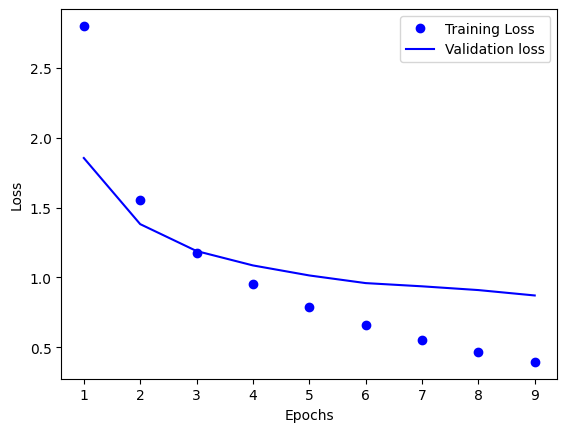

In [43]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

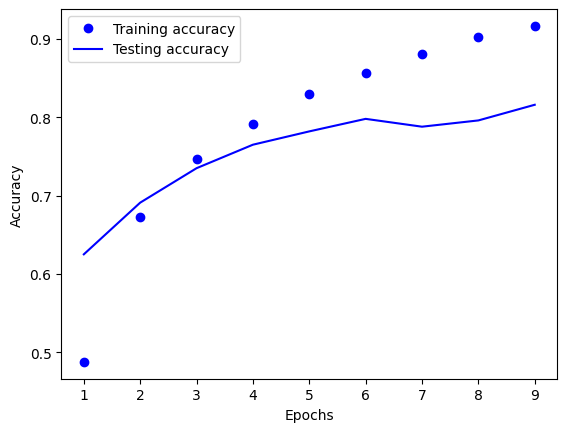

In [44]:
plt.clf()
acc = history_dict["accuracy"]
acc_val = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, acc_val, "b", label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
result = model.evaluate(X_test, y_test)
result

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.9186


[0.9327555894851685, 0.7911843061447144]

In [47]:
predictions = model.predict(X_test)
predictions, predictions.shape

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([[3.6119822e-05, 5.7153701e-04, 1.5093377e-04, ..., 3.3656459e-05,
         5.3590943e-06, 3.4488592e-05],
        [7.2051315e-03, 1.9774918e-02, 5.5336617e-03, ..., 8.6663778e-05,
         1.7074404e-05, 8.9278881e-05],
        [8.2502393e-03, 6.9270873e-01, 1.3319805e-02, ..., 1.5017438e-03,
         4.4380542e-04, 7.3626096e-04],
        ...,
        [1.0300041e-04, 1.5620217e-03, 3.8167313e-04, ..., 3.7871665e-04,
         5.7226924e-05, 1.8443521e-04],
        [5.6142040e-04, 3.3644453e-02, 5.6971088e-03, ..., 5.9463567e-04,
         9.3991854e-05, 2.5330312e-04],
        [5.5092428e-04, 6.0123360e-01, 1.0461418e-02, ..., 2.6944212e-03,
         2.2737408e-04, 1.0909612e-03]], dtype=float32),
 (2246, 46))

In [50]:
predictions_final = [np.argmax(i) for i in predictions]